# **New York Housing Price Estimator: Leveraging Machine Learning for Real Estate Valuation**
By Leticia Genao

#### **Problem Statement**
In the complex landscape of the New York real estate market, accurately predicting housing prices is crucial for buyers, sellers, and investors alike. The "New York Housing Price Estimator" project utilizes machine learning to analyze various factors influencing house prices, enabling more informed decision-making. By considering attributes such as the number of bedrooms, bathrooms, square footage, and location, this model provides users with accurate price estimations, fostering transparency and efficiency in the real estate market.

#### **Data Source**: 
[New York Housing Market - Kaggle ](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/data)

#### **Background Info/Outside Research**
The real estate market in New York City is notable for its volatility and complexity, with prices influenced by a myriad of factors including economic shifts, demographic changes, and zoning regulations. The COVID-19 pandemic introduced new dynamics, such as changes in homebuyer preferences and fluctuations in home inventory, which further complicated the market landscape. According to recent reports, residential housing market activity contributes significantly to the U.S. GDP, emphasizing the economic importance of accurate real estate valuation (Investopedia, 2024).

Despite a general upswing in prices, many New Yorkers face challenges such as "housing lock," where the scarcity of inventory and high mortgage rates discourage homeowners from selling. This project leverages advanced predictive modeling techniques to enhance the accuracy and reliability of real estate valuations, helping users navigate the complexities of the New York housing market more effectively.

#### **References:**
- [Spotlight: New York City’s Homeowner Housing Market](https://comptroller.nyc.gov/reports/spotlight-new-york-citys-homeowner-housing-market/)
- [Investopedia - Top U.S. Housing Market Indicators](https://www.investopedia.com/articles/personal-finance/033015/top-us-housing-market-indicators.asp)

In [412]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from joblib import dump #better than pickle for saving arrays that might be stored within estimator objects (for the modeling)


In [413]:
# Load the data
data_path = 'data/NY-House-Dataset.csv'
df = pd.read_csv(data_path)
df.head()
df_original = df.copy()

### Data Exploration

In [414]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [415]:
# Display summary statistics
df.describe(include='all').head(20)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
count,4801,4801,4.801000e+03,4801.000000,4801.000000,4801.000000,4801,4801,4801,4801,4801,4801,4801,4801,4801,4801.000000,4801.000000
unique,1036,13,NaN,NaN,NaN,NaN,4582,308,4583,29,11,21,174,2731,4550,NaN,NaN
top,Brokered by COMPASS,Co-op for sale,NaN,NaN,NaN,NaN,2619 Shore Pkwy,"Brooklyn, NY 11235","2619 Shore PkwyBrooklyn, NY 11223",United States,New York,New York,Manhattan,2,"61-20 Grand Central Pkwy, Forest Hills, NY 113...",NaN,NaN
freq,456,1450,NaN,NaN,NaN,NaN,3,102,3,2484,2505,1016,979,20,4,NaN,NaN
mean,NaN,NaN,2.356940e+06,3.356801,2.373861,2184.207862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714227,-73.941601
std,NaN,NaN,3.135525e+07,2.602315,1.946962,2377.140894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087676,0.101082
min,NaN,NaN,2.494000e+03,1.000000,0.000000,230.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499546,-74.253033
25%,NaN,NaN,4.990000e+05,2.000000,1.000000,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.639375,-73.987143
50%,NaN,NaN,8.250000e+05,3.000000,2.000000,2184.207862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726749,-73.949189
75%,NaN,NaN,1.495000e+06,4.000000,3.000000,2184.207862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.771923,-73.870638


### Notes
* **Price Distribution**
  - The price distribution is heavily right-skewed, as evidenced by the large difference between the median and mean prices, and the presence of extreme outliers (e.g., maximum price of $2,147,484,000).

* **Property Characteristics**
  - The dataset includes properties ranging from 1 to 50 bedrooms and bathrooms, with some extreme values at the upper end. The square footage of properties also varies widely, with a minimum of 230 sqft and a maximum of 65,535 sqft.


In [416]:
# Converting column names to snake_case for consistency and easier coding
df.columns = [col.strip().replace(' ', '_').replace("'", "").replace("/", "_").replace("\\", "_").lower() for col in df.columns]

# Check
print(df.columns)

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')


In [417]:
df.select_dtypes(include = {'object'}).nunique()

brokertitle                    1036
type                             13
address                        4582
state                           308
main_address                   4583
administrative_area_level_2      29
locality                         11
sublocality                      21
street_name                     174
long_name                      2731
formatted_address              4550
dtype: int64

In [418]:
df['locality'].value_counts()

locality
New York           2505
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Brooklyn              6
Queens                6
The Bronx             5
Flatbush              1
Name: count, dtype: int64

In [419]:
df['sublocality'].value_counts()

sublocality
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Riverdale              4
Flushing               4
Coney Island           3
East Bronx             1
Brooklyn Heights       1
Jackson Heights        1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64

### Notes 
* It might be best to feature engineer the data into specific boroughs for usablility in deployed app.
  

In [420]:
df['type'].value_counts()

type
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

### Notes
* Pending, Contingent, Land for sale, For sale, and Coming Soon may not be the most relevant categories for predicting housing prices. These categories  reflect the sales process stage or property type, rather than intrinsic property characteristics that directly influence price. Excluding them from the final feature set will help streamline the  model and focus on more directly relevant predictors.

### Data Cleaning

In [421]:
# Remove unnecessary columns
columns_to_drop = ['brokertitle', 'address', 'state', 'main_address', 'administrative_area_level_2', 'street_name', 'long_name', 'formatted_address', 'latitude', 'longitude']

# Strip whitespaces from column names
df.columns = df.columns.str.strip()

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Check column names after dropping
print("Column names after dropping:")
print(df.columns)


Column names after dropping:
Index(['type', 'price', 'beds', 'bath', 'propertysqft', 'locality',
       'sublocality'],
      dtype='object')


In [422]:
# Filter the DataFrame to isolate rows where the 'locality' column is 'United States'
us_rows = df[df['locality'] == 'United States']

# Check if all 'United States' rows have a 'sublocality' belonging to New York
all_us_in_ny = all(us_rows['sublocality'].str.contains('New York'))

# Print the result
print("All 'United States' rows have a 'sublocality' belonging to New York:", all_us_in_ny)


All 'United States' rows have a 'sublocality' belonging to New York: True


In [423]:
# Defining the mapping of localities to boroughs with dictionary key:value pairs
borough_mapping = {
    'New York': 'Manhattan',
    'New York County': 'Manhattan',
    'The Bronx': 'The Bronx',
    'Kings County': 'Brooklyn',
    'Bronx County': 'The Bronx',
    'Queens County': 'Queens',
    'Richmond County': 'Staten Island',
    'United States': 'Manhattan',
    'Brooklyn': 'Brooklyn',
    'Queens': 'Queens',
    'Flatbush': 'Brooklyn' 
}

# Mapping the values in the locality column to boroughs
df['borough'] = df['locality'].map(borough_mapping)

# Display the updated DataFrame with the new 'borough' column
print(df.head())

                 type      price  beds       bath  propertysqft  locality  \
0      Condo for sale     315000     2   2.000000        1400.0  New York   
1      Condo for sale  195000000     7  10.000000       17545.0  New York   
2      House for sale     260000     4   2.000000        2015.0  New York   
3      Condo for sale      69000     3   1.000000         445.0  New York   
4  Townhouse for sale   55000000     7   2.373861       14175.0  New York   

       sublocality    borough  
0        Manhattan  Manhattan  
1  New York County  Manhattan  
2  Richmond County  Manhattan  
3  New York County  Manhattan  
4  New York County  Manhattan  


In [424]:
print(f"Borough Percentages: {df['borough'].value_counts(normalize=True)}")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Borough Count: {df['borough'].value_counts()}")

Borough Percentages: borough
Manhattan        0.733389
Queens           0.117267
Brooklyn         0.098105
The Bronx        0.038950
Staten Island    0.012289
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Borough Count: borough
Manhattan        3521
Queens            563
Brooklyn          471
The Bronx         187
Staten Island      59
Name: count, dtype: int64


In [425]:
# Clean up the type column
type_mapping = {
    'Co-op for sale': 'Co-op',
    'House for sale': 'House',
    'Condo for sale': 'Condo',
    'Multi-family home for sale': 'Multi-family',
    'Townhouse for sale': 'Townhouse',
    'Condop for sale': 'Co-op',  # Assumed to be similar to Co-op
    'Mobile house for sale': 'Other',  # Only one value in dataset
    'Pending': 'Other',
    'Contingent': 'Other',
    'Land for sale': 'Other',
    'For sale': 'Other',
    'Foreclosure': 'Other',
    'Coming Soon': 'Other'
}

# Applying dictionary mapping
df['type'] = df['type'].replace(type_mapping)

# Drop rows with 'Other' in the 'type' column
other_rows = df[df['type'] == 'Other']
df.drop(other_rows.index, inplace=True)

# Check the updated DataFrame
print(f"Type Percentages: {df['type'].value_counts(normalize=True)}")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Type Count: {df['type'].value_counts()}")

Type Percentages: type
Co-op           0.331889
House           0.230839
Condo           0.203239
Multi-family    0.165830
Townhouse       0.068203
Name: proportion, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Type Count: type
Co-op           1455
House           1012
Condo            891
Multi-family     727
Townhouse        299
Name: count, dtype: int64


In [426]:
# Remove unnecessary columns
columns_to_drop_2 = ['locality', 'sublocality']

# Drop the specified columns
df.drop(columns_to_drop_2, axis=1, inplace=True)

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4384 entries, 0 to 4800
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          4384 non-null   object 
 1   price         4384 non-null   int64  
 2   beds          4384 non-null   int64  
 3   bath          4384 non-null   float64
 4   propertysqft  4384 non-null   float64
 5   borough       4384 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 239.8+ KB


In [428]:
df.describe()

,price,beds,bath,propertysqft
count,4.384000e+03,4384.000000,4384.000000,4384.000000
mean,2.463063e+06,3.369982,2.384720,2198.844372
std,3.280341e+07,2.677165,2.002288,2460.376400
min,4.950000e+04,1.000000,0.000000,250.000000
25%,4.990000e+05,2.000000,1.000000,1199.500000
50%,8.480000e+05,3.000000,2.000000,2184.207862
75%,1.500000e+06,4.000000,3.000000,2184.207862
max,2.147484e+09,50.000000,50.000000,65535.000000


## Visualizations 

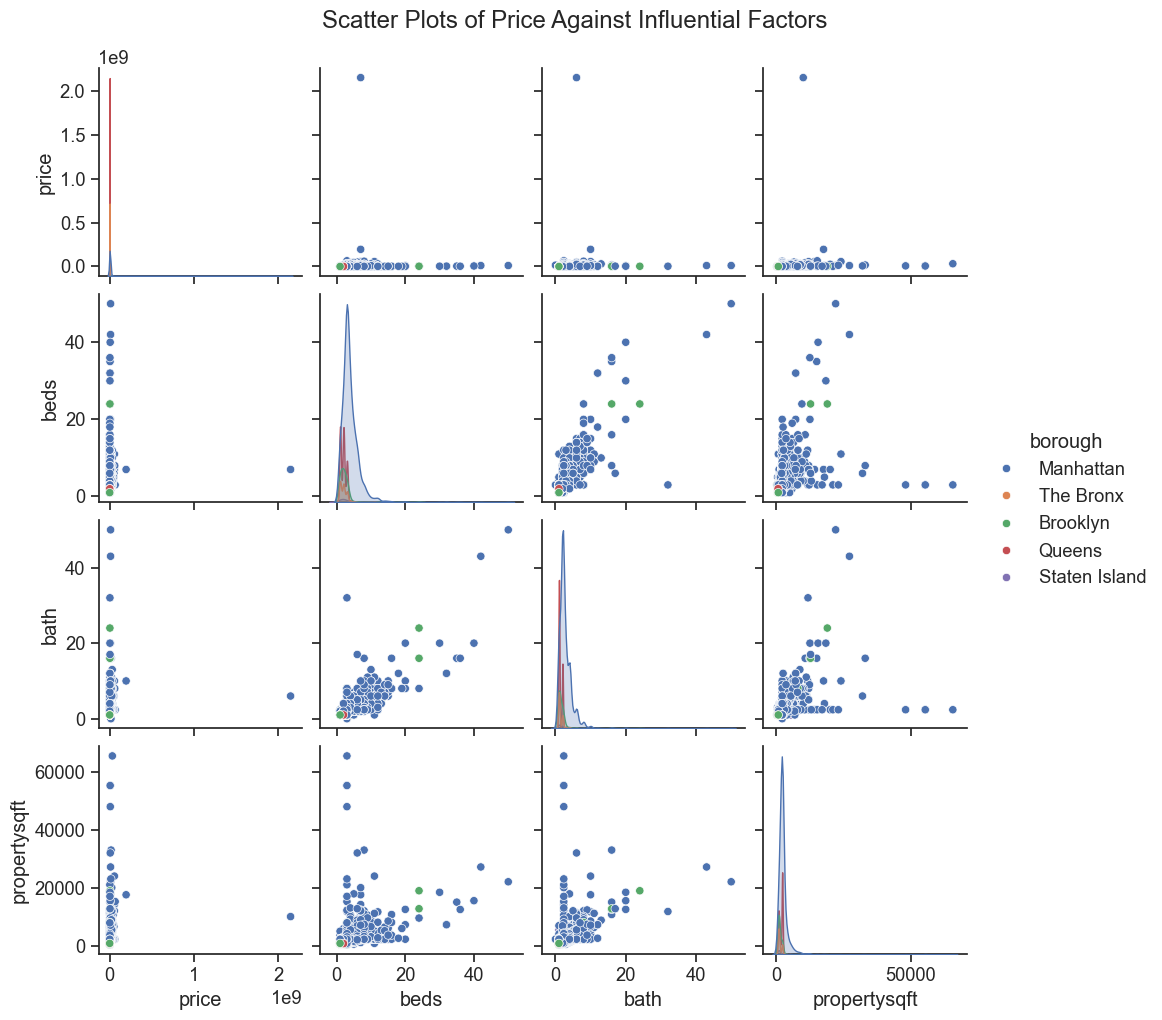

In [429]:
# Set style and context for Seaborn
sns.set(style="ticks", palette="deep")
sns.set_context("notebook", font_scale=1.2)

# Pairplot
pair_plot = sns.pairplot(df[['price', 'beds', 'bath', 'propertysqft', 'borough']], hue='borough', diag_kind='kde')
pair_plot.fig.suptitle('Scatter Plots of Price Against Influential Factors', y=1.02)
pair_plot.savefig('images/scatterplot_outliers.png')
plt.show()

### Notes
- **Price Distribution:**
  - The price distribution has a number of extreme outliers, particularly in Manhattan where a small number of homes are priced far higher than in other boroughs.
  - At all boroughs, the majority of property values are concentrated at the lower end, indicating a skewed distribution where the majority of listings are comparatively cheap in comparison to a small number of high-end homes.
  
- **Relationship Between Price and Beds:**
  - Prices and beds appear to be somewhat positively correlated; this is especially true in Manhattan and Brooklyn. Prices tend to increase with the number of bedrooms.
  
   
- **Relationship Between Price and Baths:**
  - Like beds, larger baths typically translate into greater pricing, especially in Manhattan where some larger-than-average residences fetch extremely high rates.

 
- **Relationship Between Price and Property Square Feet:**
  - Property sq ft and price have a clear positive correlation, with Manhattan showing the largest correlation. In general, larger properties cost more. In other boroughs, this tendency is discernible but not as strong.

- **Distribution Across Boroughs:**
  - **Manhattan**: Has the widest range of prices, bedrooms, and bathrooms, which is expected given the market dynamics there, which include a combination of older, smaller flats and high-end luxury residences.
  - Compared to Manhattan, **Brooklyn** and **Queens** have a more uniform distribution of beds and bathrooms but a narrower range of property square feet.
  - There are often fewer beds and bathrooms per home and fewer expensive listings in **The Bronx** and **Staten Island**, which may be a reflection of differing market conditions or various kinds of available properties.

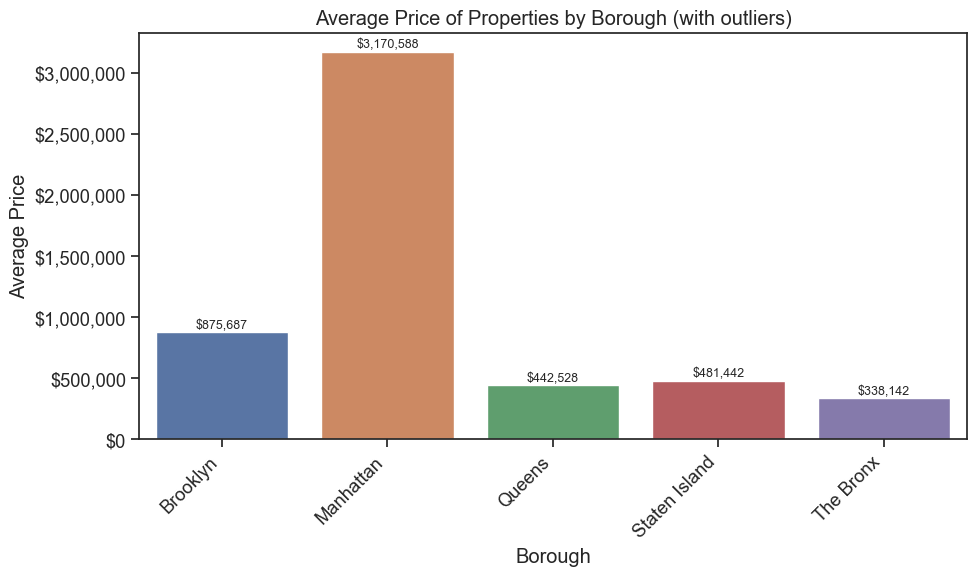

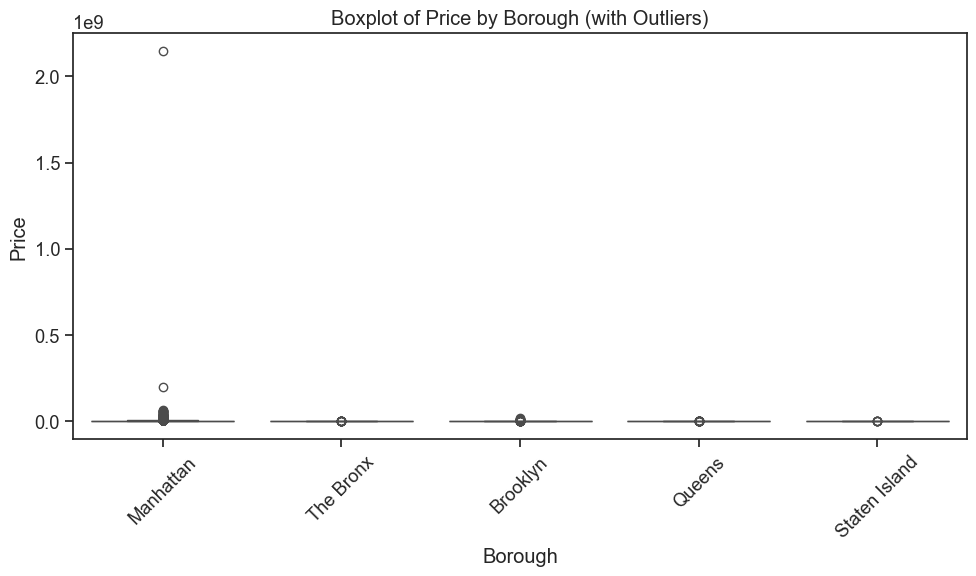

In [430]:
# Calculating average price per borough
average_price_by_borough = df.groupby('borough')['price'].mean()

# Using the custom color palette
custom_palette = sns.color_palette("deep", len(average_price_by_borough))

# Creating bar chart with custom color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_price_by_borough.index, y=average_price_by_borough.values, palette=custom_palette)
plt.title('Average Price of Properties by Borough (with outliers)')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

# Formatting y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adding text annotations above each bar
for i, v in enumerate(average_price_by_borough.values):
    ax.text(i, v + 10000, '${:,.0f}'.format(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('images/bar_chart_with_outliers.png')
plt.show()


# Boxplot with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='borough', y='price', data=df, palette='deep')
plt.title('Boxplot of Price by Borough (with Outliers)')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/boxplot_with_outliers.png')  
plt.show()

### Notes
* After reviewing the scatterplot, boxplot, and bar chart there may be a big outlier influence effecting Manhattan's average price

In [431]:
# Removing Outliers
# Calculate the first quartile (Q1)
Q1 = df['price'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [432]:
df_no_outliers.head()

,type,price,beds,bath,propertysqft,borough
0,Condo,315000,2,2.0,1400.000000,Manhattan
2,House,260000,4,2.0,2015.000000,Manhattan
3,Condo,69000,3,1.0,445.000000,Manhattan
5,House,690000,5,2.0,4004.000000,Manhattan
6,Condo,899500,2,2.0,2184.207862,Manhattan


In [433]:
df.head()

,type,price,beds,bath,propertysqft,borough
0,Condo,315000,2,2.000000,1400.0,Manhattan
1,Condo,195000000,7,10.000000,17545.0,Manhattan
2,House,260000,4,2.000000,2015.0,Manhattan
3,Condo,69000,3,1.000000,445.0,Manhattan
4,Townhouse,55000000,7,2.373861,14175.0,Manhattan


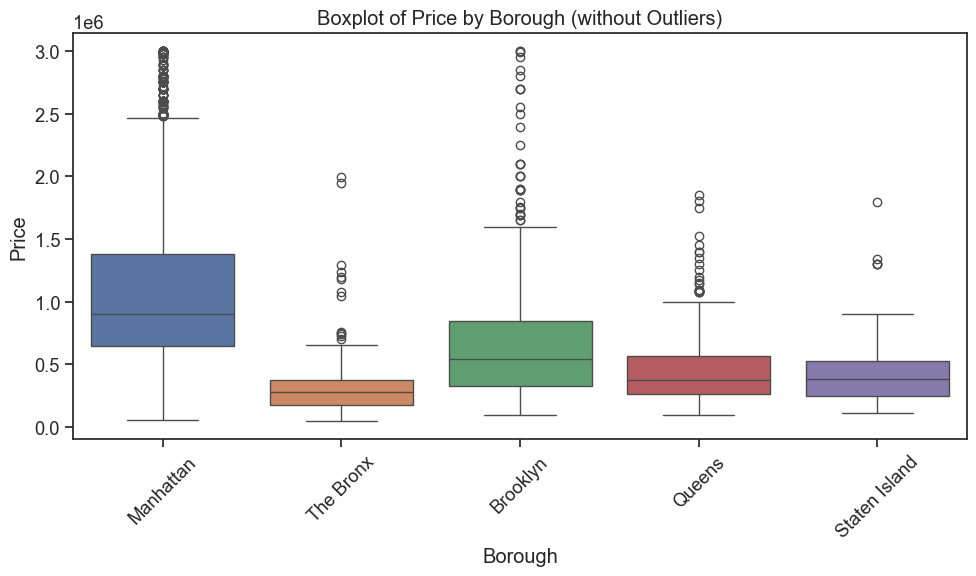

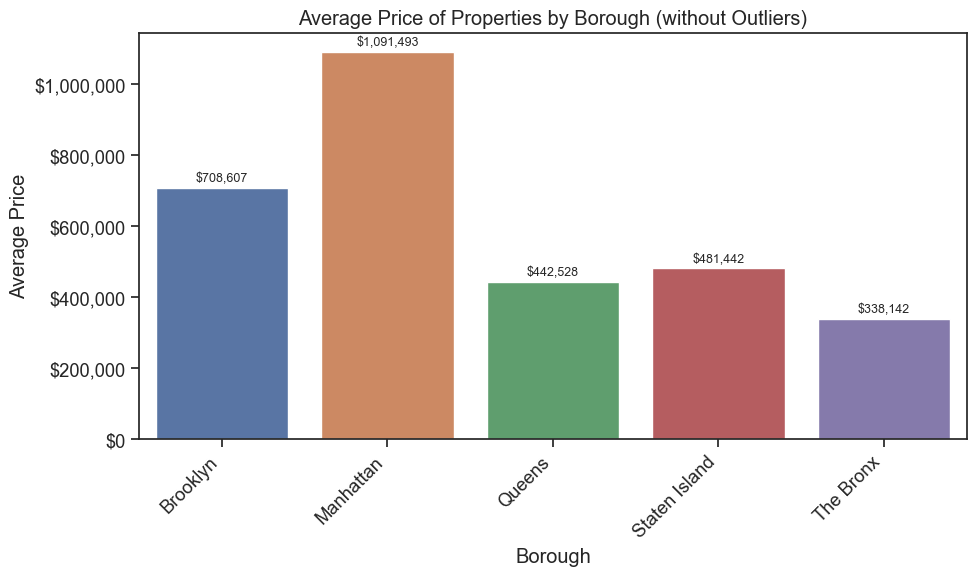

In [434]:
# Boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='borough', y='price', data=df_no_outliers, palette='deep')
plt.title('Boxplot of Price by Borough (without Outliers)')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/boxplot_without_outliers.png')  
plt.show()


# Bar chart with updated DataFrame without outliers
average_price_by_borough_without_outliers = df_no_outliers.groupby('borough')['price'].mean()

# Creating bar chart with custom color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_price_by_borough_no_outliers.index, y=average_price_by_borough_no_outliers.values, palette=custom_palette)
plt.title('Average Price of Properties by Borough (without Outliers)')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

# Formatting y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

# Adding text annotations above each bar
for i, v in enumerate(average_price_by_borough_no_outliers.values):
    ax.text(i, v + 10000, '${:,.0f}'.format(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('images/bar_chart_without_outliers.png')  # Save the image to the images folder
plt.show()

### Notes
- **Price Variability by Borough**
  - *Manhattan*
    - Has the largest interquartile range (IQR) and the highest median price, suggesting that there is more variation in real estate values. The average cost is approximately $1,000,000. There are still a lot of points over the upper whisker even after the outliers have been removed, indicating that several expensive properties are still inside the modified threshold.
  - *Brooklyn*
    - Displays a narrower IQR and a significantly lower median price when compared to Manhattan. While still relatively high, Brooklyn prices are less erratic than those in Manhattan.
  - *Queens*
    - Has a median price lower than Brooklyn's, with a narrower IQR. This suggests a more compact distribution of property prices in Queens.
  - *The Bronx*
    - Displays the lowest median prices among the boroughs and a very tight IQR, indicating less variability and generally more affordable property prices.
  - *Staten Island*
    - Features a median price similar to that of The Bronx but with a slightly broader IQR, indicating a slightly wider distribution of prices.

  
- **Outlier Characteristics:**
  - Manhattan has the greatest amount of outliers, with all boroughs displaying outliers beyond the top whiskers even after filtering based on the IQR. This may suggest that there are properties that are extremely valued, perhaps even luxury real estate in New York.

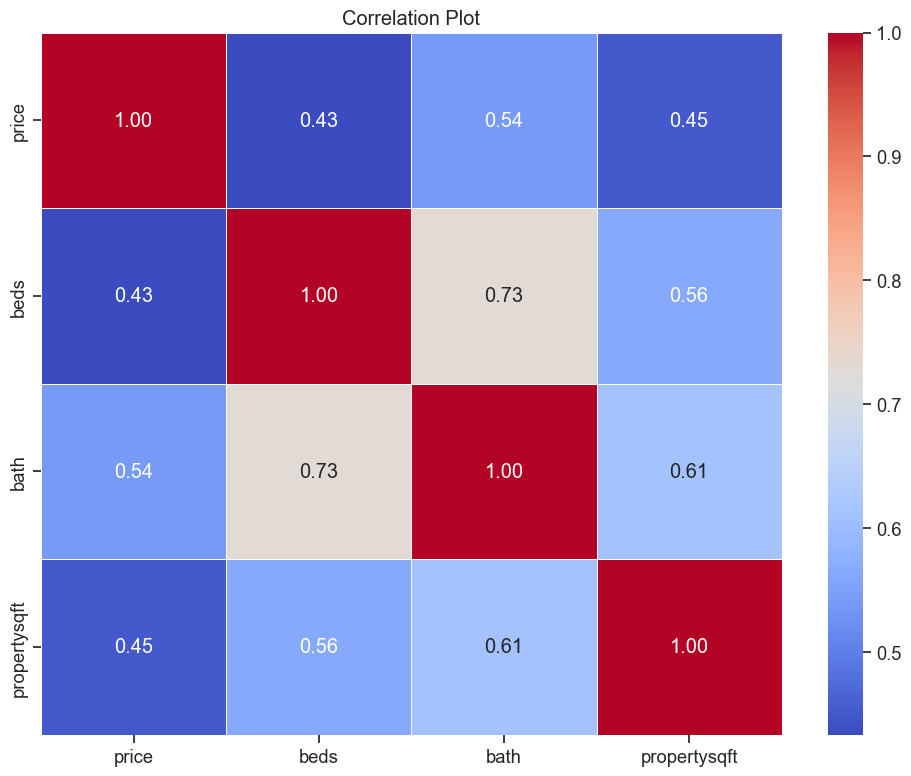

In [435]:
# Select only numeric columns for correlation analysis
numeric_df = df_no_outliers.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.tight_layout()
plt.savefig('images/correlation_plot.png')  # Save the image to the images folder
plt.show()


### Notes
- **Price Correlations**
    -  The *number of bathrooms* (0.54) shows a strong positive correlation with *property prices*, suggesting that they significantly influence property values, potentially more so than the number of *bedrooms* (0.43) and *property square footage* (0.45).
  
- **Beds and Bath Correlation**
  - There is a strong correlation (0.73) between the number of *bedrooms* and *bathrooms*, indicating that larger homes typically have more of both.
  
- **Property Size Relations**
  - *Property square footage* shows moderate to strong correlations with both the number of *bedrooms* (0.56) and *bathrooms* (0.61), affirming that larger homes are generally more spacious and better equipped.


- **Implications**
  - *Bathrooms* emerge as a critical feature in property valuation, possibly more impactful than the size or the number of bedrooms in determining prices.
  - For property valuation, incorporating the number of *bathrooms*, *bedrooms*, and *property square footage* could enhance model accuracy.


## Modeling

In [436]:
df_no_outliers[['borough','type']].value_counts()

borough        type        
Manhattan      House           941
               Multi-family    667
               Co-op           589
Queens         Co-op           400
Manhattan      Condo           341
Brooklyn       Co-op           215
               Condo           190
Manhattan      Townhouse       152
The Bronx      Co-op           146
Queens         Condo           140
Staten Island  Condo            36
The Bronx      Condo            31
Brooklyn       Multi-family      7
Staten Island  Co-op             5
               Multi-family      4
Brooklyn       House             4
               Townhouse         3
The Bronx      House             2
               Townhouse         2
Queens         House             1
               Multi-family      1
Staten Island  Townhouse         1
Name: count, dtype: int64

In [437]:
# One-hot encoding 'borough' and 'type'
df_encoded = pd.get_dummies(df_no_outliers, columns=['borough', 'type'], drop_first=True)

In [438]:
df_encoded.head()

,price,beds,bath,propertysqft,borough_Manhattan,borough_Queens,borough_Staten Island,borough_The Bronx,type_Condo,type_House,type_Multi-family,type_Townhouse
0,315000,2,2.0,1400.000000,True,False,False,False,True,False,False,False
2,260000,4,2.0,2015.000000,True,False,False,False,False,True,False,False
3,69000,3,1.0,445.000000,True,False,False,False,True,False,False,False
5,690000,5,2.0,4004.000000,True,False,False,False,False,True,False,False
6,899500,2,2.0,2184.207862,True,False,False,False,True,False,False,False


In [439]:
X = df_encoded.drop('price', axis=1)  # Assuming 'price' is the target variable
y = df_encoded['price']

# Split data into training + validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training + validation set into actual training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [440]:
# Defining a pipeline with a placeholder for the regressor
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Normalize data
    ('regressor', LinearRegression())
])

# Creating a parameter grid
param_grid = [
    {
        'regressor': [LinearRegression()],
        'regressor__fit_intercept': [True, False]
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 150, 200],
        'regressor__max_features': ['auto', 'sqrt']
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [50, 100, 150],
        'regressor__learning_rate': [0.03, 0.05, 0.07,],
        'regressor__max_depth': [4, 5, 6]
    }
]

# Creating grid search object
grid = GridSearchCV(pipe, param_grid, cv=12, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')

# Fitting on data
best_model = grid.fit(X_train, y_train)

# Output best model and parameters
print("Best model:", best_model.best_estimator_.get_params()['regressor'])
print("Best parameters:", best_model.best_params_)

# Validation metrics
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {mse_val}")
print(f"Validation Root Mean Squared Error: {rmse_val}")  
print(f"Validation R^2 Score: {r2_val}")

# Test metrics
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test Root Mean Squared Error: {rmse_test}")  
print(f"Test R^2 Score: {r2_test}")

Fitting 12 folds for each of 35 candidates, totalling 420 fits
Best model: GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=150)
Best parameters: {'regressor': GradientBoostingRegressor(), 'regressor__learning_rate': 0.03, 'regressor__max_depth': 6, 'regressor__n_estimators': 150}
Validation Mean Squared Error: 149455689344.18527
Validation Root Mean Squared Error: 386594.99394610024
Validation R^2 Score: 0.609745886999552
Test Mean Squared Error: 159809342967.4611
Test Root Mean Squared Error: 399761.607670698
Test R^2 Score: 0.5918489225968967


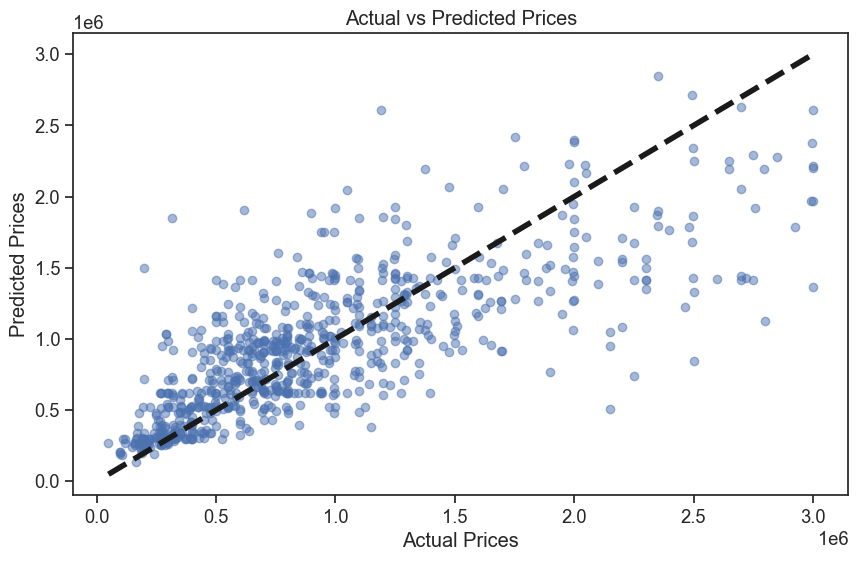

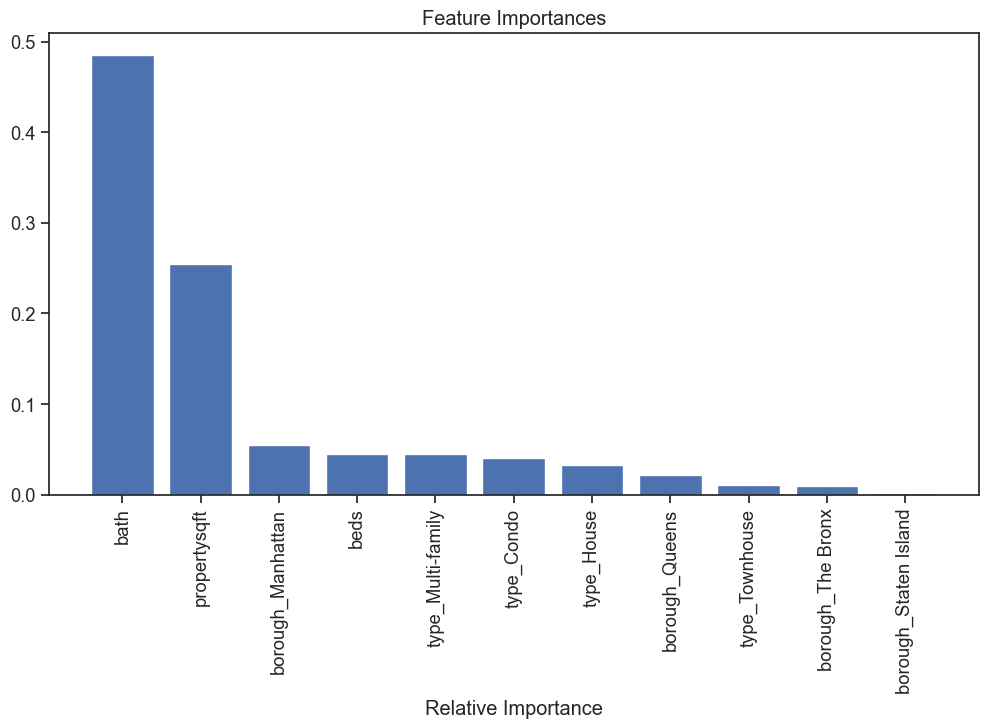

In [441]:
# Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.savefig('images/actual_vs_predicted.png')  
plt.show()

# Feature importance visualization (for RandomForest and GradientBoosting)
if hasattr(best_model.best_estimator_.named_steps['regressor'], 'feature_importances_'):
    importances = best_model.best_estimator_.named_steps['regressor'].feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlabel('Relative Importance')
    plt.savefig('images/feature_importance.png')  
    plt.show()


### Evaluation
The final model, a GradientBoostingRegressor, yields reasonable performance metrics, with an R² score of approximately 0.610 on the validation set and 0.592 on the test set. This indicates that the model can explain about 61% of the variance in housing prices. However, the Root Mean Squared Error (RMSE) is relatively high at around $386,376 on the validation set and $399,920 on the test set, suggesting significant prediction errors, particularly with higher-priced properties.


- **Key Findings**
    -  ***Feature Importance:*** The most significant predictors of housing prices are the number of bathrooms (*bath*), property square footage (*propertysqft*), and location, particularly properties located in Manhattan (*borough_Manhattan*).
  
- **Prediction Accuracy**
  - The scatter plot reveals that the model performs reasonably well in predicting homes at lower price points but struggles with accuracy for higher-priced properties, as indicated by the distribution of data points around the line of perfect prediction.
  
- **Model Refinement:**
  - **Data Enrichment:** Further exploration with more complex models or advanced machine learning techniques could enhance predictions, especially for high-value properties.
  - **Feature Engineering:** Consider incorporating interaction terms such as Beds to Baths Ratio, Square Footage per Bed and Bath, and Bathroom Density per thousand sqft, as these may improve the model's predictive powe


In summary, while the GradientBoostingRegressor serves as a solid foundational model for price prediction, there is room for improvement through the implementation of sophisticated modeling approaches, data enrichment strategies, and deliberate feature engineering techniques.


In [442]:
# Save the model as a pickle file
filename = 'finalized_model.pkl'
dump(best_model, filename)

print("Model saved successfully to", filename)


Model saved successfully to finalized_model.pkl
